In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
results_xlsx = 'RADAR Heatmaps CNN Results.xlsx'

In [5]:
overall_results_df = pd.read_excel(results_xlsx, sheet_name='overall')

In [6]:
overall_results_df

,Model,Pretrained?,Total Parameters,Model Size (MB),Average Inference Time (ms),Average Throughput (images/s),Validation Accuracy (%)
0,BaseNet,No,460630,1.8,2.07,312.28,58.12
1,SqueezeNet,Yes,739528,3.0,5.13,125.29,83.87
2,MobileNetv2,Yes,2234120,9.2,5.36,113.86,95.27
3,VGG11,Yes,128799112,515.2,19.75,32.65,89.68
4,ResNet18,Yes,11180616,44.8,8.64,75.03,92.26


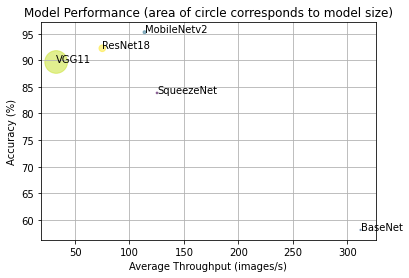

In [23]:
fig, ax = plt.subplots()

model_size = overall_results_df['Model Size (MB)']
acc = overall_results_df['Validation Accuracy (%)']
throughput = overall_results_df['Average Throughput (images/s)']
colors = np.random.rand(overall_results_df.shape[0])

ax.scatter(throughput, acc, s=model_size, c=colors, alpha=0.5)
ax.grid(True)
ax.set_xlabel('Average Throughput (images/s)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance (area of circle corresponds to model size)')

for i, txt in enumerate(overall_results_df['Model']):
    ax.annotate(txt, (throughput[i], acc[i]))

In [35]:
classwise_results_df = pd.read_excel(results_xlsx, sheet_name='classwise', index_col='Model')

In [36]:
classwise_results_df

,bicyclerack,bush,firehydrant,human,lamppost,middle_of_sidewalk,tree,wall
Model,,,,,,,,
BaseNet,0.602,0.561,0.313,0.301,0.783,0.824,0.222,0.620
SqueezeNet,0.800,0.866,0.583,0.533,0.960,0.967,0.844,0.876
MobileNetv2,1.000,1.000,0.933,1.000,0.933,0.955,0.888,0.962
VGG11,0.900,0.933,0.783,0.800,0.960,0.988,0.844,0.876
ResNet18,1.000,0.967,0.883,0.900,0.960,0.955,0.844,0.895


Text(0, 0.5, 'Accuracy (%)')

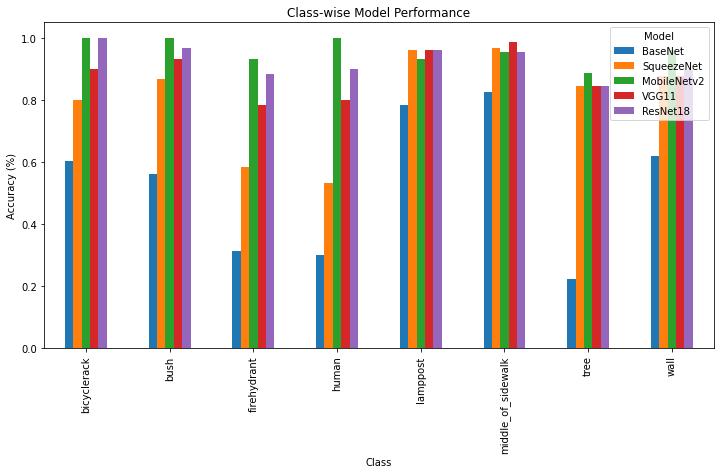

In [45]:
classwise_results_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Class-wise Model Performance')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')